In [40]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [41]:
sample_size = 1000

#starting coefficients:
b= -1.5
w_1 = 2.0



In [42]:
# randomly drawn value drom standard normal dist
np.random.normal()

0.018016872044446585

In [43]:
# array of random normal vals:
np.random.normal(size=10)

array([ 0.47263035, -1.36685836,  0.59256727, -2.70439163, -0.62988455,
       -0.48827384,  0.63332683,  0.02263085, -1.40556305, -0.98499313])

In [44]:
# create two arrays:



x = np.random.normal(size=sample_size)
y = b + w_1*x + np.random.normal(size=sample_size)


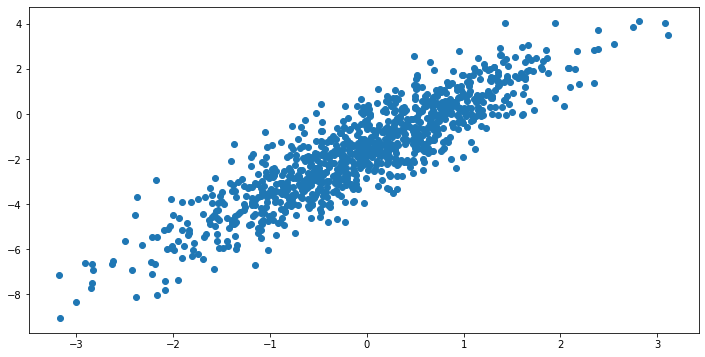

In [45]:
plt.scatter(x,y)

## Step 1: calculate predicted values

In [46]:
def make_line (x, slope, intercept):
    """Calculate the prediction for y values for given x values
    
    Params:
    ------
    x : the x values
    slope: the slope of the fitted line
    intercept: the y-intercept of the fitted line
    
    """
    ypred = intercept + slope*x
    return ypred

In [47]:
ypred = make_line(x, w_1, b)

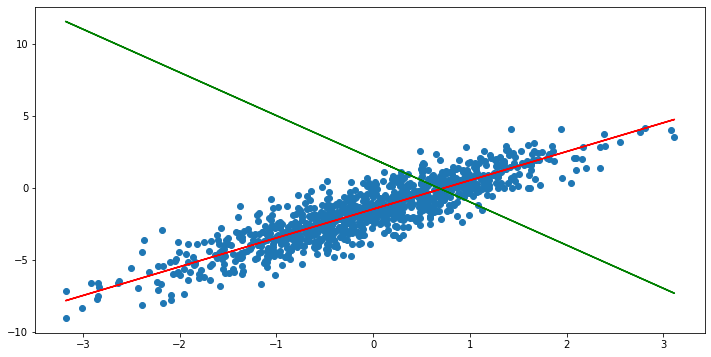

In [48]:
plt.scatter(x,y)
plt.plot(x, ypred, color='r')
plt.plot(x, make_line(x, -3.0, 2.0), color = 'g')
plt.rcParams['figure.figsize'] = (12,6)

## Step 2:  MSE

In [49]:
def mse(ytrue, ypred):
    """Calculates mean_squared_error for y-values and predicted values of y
    
    Params:
    ------
    ytrue: the true values of y
    ypred : the predicted values of y
    
    """
    error = np.mean((ytrue-ypred)**2)
    return error


In [50]:
#test the function
mse(y, make_line(x,-3.0,2.0))

39.33773229562061

In [51]:
#validate the outcome :
from sklearn.metrics import mean_squared_error
mean_squared_error (y, make_line(x, -3,2))

39.33773229562061

In [52]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64


In [53]:
# assert statement: if a comparison is True, an assert statement passes silently, otherwise it returns an error:
#assert 1==2, "the two compared values are not equal"

## Step 3: gradient descent

In [58]:
def calc_gradient(x, ytrue, slope, intercept):

    dw = 0.0001 #small change applied to each parameter
    ypred = make_line(x, slope, intercept)

    '''tweak first parameter'''
    slope_change = slope + dw
    # calculate predictions using intercept and slope_change
    ypred_slope = make_line(x, slope_change, intercept)
    deriv_slope = (mse(ytrue,ypred_slope) - mse(ytrue, ypred)) / dw

    '''tweak second parameter'''
    intercept_change = intercept + dw
    # calculate predictions using intercept_change and slope
    ypred_intercept = make_line(x, slope, intercept_change)
    deriv_intercept = (mse(ytrue, ypred_intercept) - mse(ytrue, ypred)) / dw

    return [deriv_slope, deriv_intercept] # return both derivations as a list

## Step 4: algorithm

In [59]:
#initialisinfg a few paramerters:
SLOPE = -1.0 # arbitrary starting value
INTERCEPT = 5.0 # arbitrary starting value
LR = 0.1 # choose a small learning rate
MAX_ITER = 500

1. In each iteration of the loop, calculate the gradient of your loss function with respect to each model parameter.

2. For each model parameter, multiply the corresponding partial derivative by the learning rate, then negate it.

3. Add the resulting product to the previous value of the model parameter to get the updated parameter value.

4. Overwrite the values of each parameter with its updated value.

5. Print all variables as you loop to make sure your parameters are converging to their expected values.

6. Repeat the above steps `MAX_ITER` times.

7. If the gradient becomes smaller than some pre-determined small threshold value, break out of the loop.

In [70]:
import time
from IPython import display

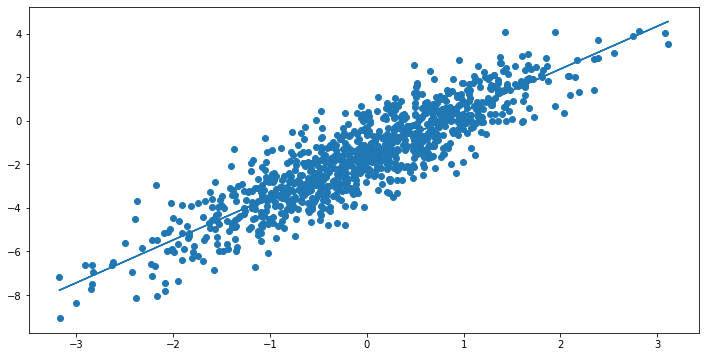

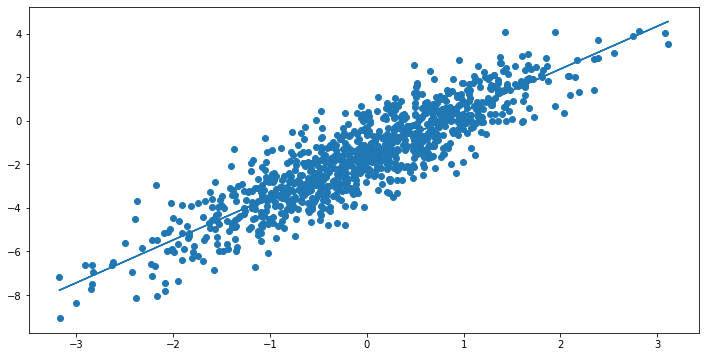

In [71]:
for iteration in range(MAX_ITER):
    gradient = calc_gradient(x, y, SLOPE, INTERCEPT)
    
    update_slope = -LR*gradient[0]
    update_intercept = -LR*gradient[1]
    
    SLOPE = SLOPE + update_slope
    INTERCEPT = INTERCEPT + update_intercept
    
    print(f'The slope after iteration {iteration} is {SLOPE}')
    print(f'The intercept after iteration {iteration} is {INTERCEPT}')
    
    plt.scatter(x,y)
    plt.plot(x, make_line(x,SLOPE, INTERCEPT))
    display.clear_output (wait=True)
    display.display(plt.gcf())
    
    time.sleep(0.001)
    
    if abs(gradient[0])<0.01 or abs(gradient[1])<0.01: 
        break
          